# TENSOR FLOW

Es el segundo framework de codigo abierto para machine learning, desarrollada por google, enfocado en el aprendizaje profundo o tambien llamado deep learning, el cual nos permite crear redes neuronales artificiales .

Este poderoso framework esta diseñado para construir, diseñar y entrenar los modelos de aprendizaje profundo y  para hacer operaciones matematicas, lo cual puede no verse muy potente pero lo es, ya que usa grafos de flujo de datos (data flow graphs), en los cuales cada nodo representa una operación y sus enlaces el flujo de los datos,que generalmente son matrices de datos multidimensionales o tensores, que se comunican entre estos enlaces.

Adicional a esto, podemos correr nuestros modelos en forma paralela, teniendo varias CPU y GPU(usando extensiones adicionales de CUDA), lo cual vuelve nuestros modelos muy potentes y son mas rapidos de entrenar y ponerlos en pruebas o producción, que al final de cuentas es lo que deseamos cuando diseñamos un modelo, obtener buenos resultados de manera agil y facil, y tensor flow nos da mucho dinamismo en este sentido.

### LENGUAJES DISPONIBLES

Vale la pena aclarar que TensorFlow, es multiplataforma, podemos ejecutarlo en linux, windows, Mac, android e IOS, principalmente creado en C++ y Python, tambien tiene API en Haskell, Java, Go, Rust y R pero estas se encuentran menos documentadas.

También hay una version en javascript, en la bibliografia se encuentra el link de TensorFlow en Js.

### ¿POR QUÉ USAR TENSORFLOW?

Por un lado, es una de las mejores y mas utilizadas herramientas de machine learning que existen hasta el momento, esto gracias a que es código abierto y existen muchas personas que colaborar por mejorar su codigo, esto podemos apreciarlo en su github, existen muchas empresas y universidades que usan esta herramienta hoy en dia en sus investigaciones.

### EJEMPLO PRACTICO

para instalar tensorflow consulte este [link](https://www.tensorflow.org/install/)

In [36]:
import tensorflow as tf
from PIL import Image
from skimage import transform
from skimage import data
from skimage import io
#from skimage import os
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np
from skimage.color import rgb2gray
import random

In [2]:


def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
    return images, labels

In [3]:
#defino la ruta base
ROOT_PATH = "./Tensorflowdata"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")

In [4]:
#importo el directorio de entranimiento
images, labels = load_data(train_data_directory)

In [10]:
images[0].shape

(76, 52, 3)

In [17]:
images_array = np.array(images)
labels_array = np.array(labels)

# Print the `images` dimensions
print(images_array.ndim)

# Print the number of `images`'s elements
print(images_array.size)

# Print the first instance of `images`
images_array[0]

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

1
4575
1
4575
62


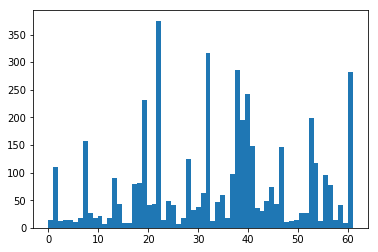

In [18]:


# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()



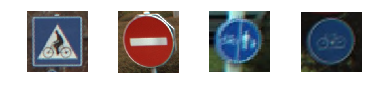

In [26]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()



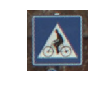

shape: (94, 94, 3), min: 24, max: 228


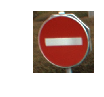

shape: (157, 154, 3), min: 10, max: 255


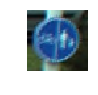

shape: (46, 46, 3), min: 0, max: 255


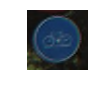

shape: (61, 62, 3), min: 1, max: 147


In [27]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

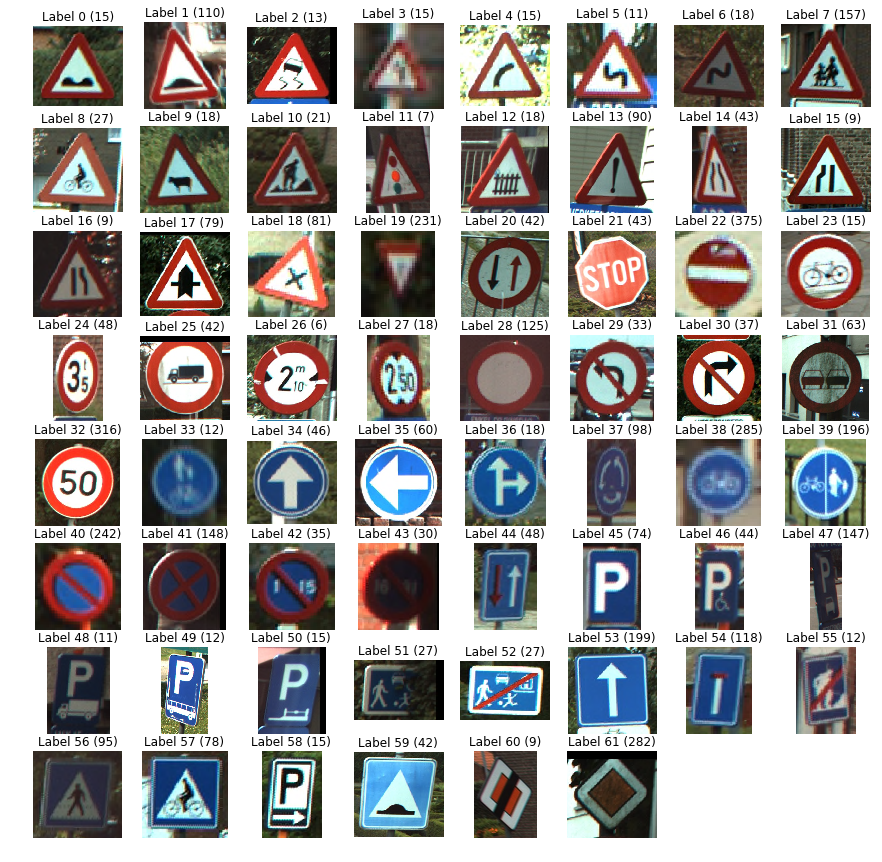

In [28]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

## EXTRACCIÓN DE CARACTERISTICAS

### ESCALANDO IMAGENES

In [31]:
from skimage import transform
# Resize images
images32 = [transform.resize(image, (28, 28), mode='constant') for image in images]
images32 = np.array(images32)


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


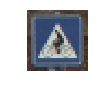

shape: (28, 28, 3), min: 0.10964885954381803, max: 0.867001800720288


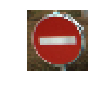

shape: (28, 28, 3), min: 0.05467436974789916, max: 0.9937500000000005


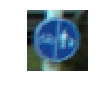

shape: (28, 28, 3), min: 0.01942276910764309, max: 0.9568277310924369


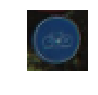

shape: (28, 28, 3), min: 0.022393957583033388, max: 0.5323679471788725


In [32]:


# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32[traffic_signs[i]].shape, 
                                                  images32[traffic_signs[i]].min(), 
                                                  images32[traffic_signs[i]].max()))



### CONVERTIR IMAGENES EN ESCALA DE GRISES

In [33]:
images32 = rgb2gray(np.array(images32))

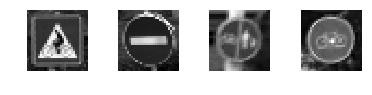

(4575, 28, 28)


In [34]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images32.shape)

## APRENDIZAJE PROFUNDO CON TENSOR FLOW

### MODELANDO LA RED NEURONAL

In [37]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


### CORRIENDO LA RED NEURONAL

In [39]:


sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')



EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 32
DONE 

### EVALUANDO LA RED NEURONAL

In [40]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[45, 20, 20, 59, 20, 61, 3, 56, 22, 47]
[45 28 24 38 40 61  1 56 22 47]


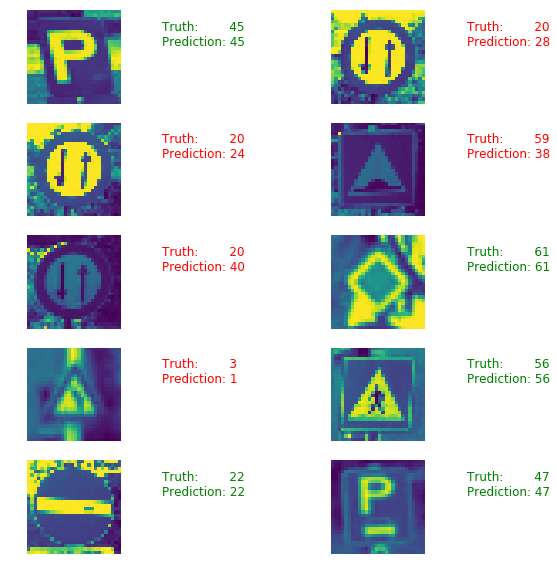

In [41]:


# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()



### EVALUANDO CON LOS DATOS DE TEST

In [43]:
# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Accuracy: 0.556


In [44]:
sess.close()


### BIBLIOGRAFIA

[Tenso flow en js](https://js.tensorflow.org/?hl=es)

[Tensor Flow data camp](https://www.datacamp.com/community/tutorials/tensorflow-tutorial)

[Calculo tensorial](https://es.wikipedia.org/wiki/C%C3%A1lculo_tensorial)

[flow data graph](https://www.threadingbuildingblocks.org/docs/help/tbb_userguide/Data_Flow_Graph.html)